*Contenuti*
===
- [La libreria NumPy](#La-libreria-NumPy)
    - [Gli array](#Gli-array)
    - [Costruzione](#Costruzione)
    - [Accesso ai singoli elementi](#Accesso-ai-singoli-elementi)
    - [*shape*, *size* e *ndim*](#shape,-size-e-ndim)
        - [*Esercizio 1*](#Esercizio-1)
    - [Slicing](#Slicing)
    - [Generazione di numeri casuali](#Generazione-di-numeri-casuali)
    - [Operazioni aggregate e *axes*](#Operazioni-aggregate-e-axes)
        - [*Esercizio 2*](#Esercizio-2)
        - [*Esercizio 3*](#Esercizio-3)
    - [*stack* e *split*](#stack-e-split)
    - [Aritmetica degli array](#Aritmetica-degli-array)
        - [*Esercizio 4*](#Esercizio-4)
    - [*Esercizio 5*](#Esercizio-5)
    - [*Esercizio 6*](#Esercizio-6)
    - [*Esercizio 7*](#Esercizio-7)

La libreria NumPy
===
Il calcolo vettoriale è molto usato nel machine learning. Lo standard Python per questo tipo di operazioni è *NumPy*. 

Per poter utilizzare NumPy lo *importiamo*: è infatti già disponibile nella distribuzione Anaconda.

In [8]:
import numpy as np
print(np.__version__)

1.24.3


Gli *array*
---
Per NumPy, ogni vettore o matrice è un *array*.

**Array**: *Insieme organizzato di elementi omogenei, identificati da uno stesso nome e da uno o più indici*.

Costruzione
---
Un array NumPy si può costruire in vari modi; per esempio, a partire da una lista Python.

In [9]:
python_lst = [3,7,2,0,6,2]
np_array = np.array(python_lst)
print(python_lst)
print(np_array)

[3, 7, 2, 0, 6, 2]
[3 7 2 0 6 2]


In [11]:
print(type(python_lst))
print(type(np_array))

<class 'list'>
<class 'numpy.ndarray'>


La funzione *full* genera un array con un numero assegnato di righe e colonne, e riempe tutte le sue posizioni con un singolo valore, anche questo assegnato.

**Nota**: NumPy tratta come array sia le matrici che i vettori (singola riga o colonna). Per comodità di lettura, anche se non è obbligatorio, chiameremo le (variabili che contengono le) matrici con la lettera maiuscola, mentre utilizzeremo la minuscola per i vettori.

In [12]:
A = np.full((5,3), 7)

A

array([[7, 7, 7],
       [7, 7, 7],
       [7, 7, 7],
       [7, 7, 7],
       [7, 7, 7]])

Le funzioni *zeros* e *ones* sono casi particolari di full, e producono array rispettivamente di soli zero e uno.

In [13]:
np.zeros((5,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [14]:
np.ones((2,7))

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

La funzione *arange* viene usata per generare numeri in un intervallo.

In [15]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Accesso ai singoli elementi
---
Come per le liste Python, si accede agli elementi di un array NumPy attraverso le parentesi quadre.

In [16]:
a = np.array([1,2,3,4,5,6,7,8])

a[0]

1

Per convenzione, nelle matrici il primo indice è quello delle righe.

In [17]:
A = np.array([[1,2,3,4],
              [5,6,7,8]])

A[0]

array([1, 2, 3, 4])

In [18]:
A[1][2]#elemento in posizione (colonna) 2 della riga 1

7

*shape*, *size* e *ndim*
---
Un array NumPy ha alcune proprietà legate alla sua struttura. 

Come abbiamo visto con full, zeros e ones, è possibile indicare il numero di righe e colonne di un array. La coppia di questi valori è detta *shape*, ed è una proprietà di ogni array.

In [19]:
A.shape

(2, 4)

Un array NumPy si può convenientemente rimodellare con la funzione *reshape*. Il nuovo numero di righe e colonne deve essere coerente con quello di partenza.

In [20]:
B = A.reshape(4,2)

B

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [21]:
B.shape

(4, 2)

In [22]:
C = B.reshape(3,3)

ValueError: cannot reshape array of size 8 into shape (3,3)

La proprietà *size* indica quanti elementi sono contenuti in un array.

In [23]:
a = np.array([1,2,3,4,5,6,7,8])

a.size

8

In [24]:
B = a.reshape(4,2)

B.size

8

In [25]:
np.zeros((10,10)).size

100

Come abbiamo detto, per NumPy ogni oggetto vettoriale è trattato come un array. Questi possono avere un numero di dimensioni a piacere.

In matematica, un vettore è formato da una sola riga (o colonna), ed ha quindi una sola dimensione. Una matrice, che ha righe e colonne, ha due dimensioni. L'estensione di una matrice a più di due dimensioni è detta *tensore*.

Un filmato può essere rappresentato come un tensore: ogni frame che lo compone è una matrice di pixel, e ciascuno di essi è sistemato sulla terza dimensione, quella del tempo.

### *Esercizio 1*
In un'immagine a colori, ad ogni pixel sono associati 3 valori tra 0 e 255, rispettivamente per i rossi, i verdi e i blu. Quante dimensioni avrà il tensore che rappresenta un filmato a colori?

---

Attraverso il campo *ndim* si può accedere al numero di dimensioni di un array.

In [26]:
a = np.arange(24)#24 elementi

print(a)
print(a.ndim)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
1


In [27]:
B = a.reshape(6,4)#6 righe, ciascuna con 4 elementi

print(B)
print(B.ndim)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
2


In [28]:
C = a.reshape(3,2,4)#'3 matrici, ciascuna con 2 righe, ciascuna delle quali con 4 elementi'

print(C)
print(C.ndim)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]]]
3


Mentre ndim è il numero di dimensioni di un array, shape indica la *profondità* di ogni dimensione. Tornando all'esempio del filmato a colori, avremo
- ndim = 4: tempo, $y$, $x$, colori
- shape = (\# frame del filmato, altezza dei frame, larghezza dei frame, 3 livelli di colore).

Slicing
---
NumPy prevede operazioni di slicing simili a quelle viste per le liste Python.

In [29]:
a = np.arange(10)

print(a[:3])
print(a[3:])

[0 1 2]
[3 4 5 6 7 8 9]


Si può accedere ad intervalli o gruppi di singole righe e colonne con una sintassi molto compatta. Il simbolo ':' indica tutti gli elementi lungo una dimensione.

In [30]:
A = np.arange(48).reshape(6,8)

A

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47]])

In [31]:
A[:,0]#(tutte le righe,) la prima colonna

array([ 0,  8, 16, 24, 32, 40])

In [32]:
A[:,-1]#(tutte le righe,) l'ultima colonna

array([ 7, 15, 23, 31, 39, 47])

In [33]:
A[0,:]#la prima riga (, tutte le colonne) 

array([0, 1, 2, 3, 4, 5, 6, 7])

In [34]:
A[1:4, -1]#righe dalla posizione 1 (inclusa) alla posizione 4 (esclusa), ultima colonna

array([15, 23, 31])

In [35]:
rows_to_keep = [1,2,-1]

A[rows_to_keep, :]#righe con indici selezionati, tutte le colonne

array([[ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [40, 41, 42, 43, 44, 45, 46, 47]])

In [36]:
A[rows_to_keep, 2:5]#righe con indici selezionati, intervallo di colonne

array([[10, 11, 12],
       [18, 19, 20],
       [42, 43, 44]])

In [37]:
cols_to_keep = [3,5]

A[:, cols_to_keep]#tutte le righe, colonne con indici selezionati 

array([[ 3,  5],
       [11, 13],
       [19, 21],
       [27, 29],
       [35, 37],
       [43, 45]])

Anche una singola immagine RGB è un tensore. Vediamo un esempio di elaborazione immagini con NumPy.

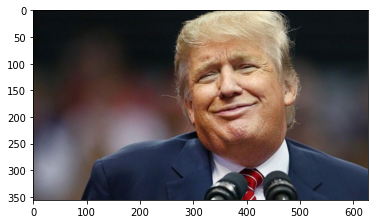

In [38]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('data/trump.jpg')
plt.imshow(image)

In [39]:
np_img = np.array(image)

print('shape:', np_img.shape)
print('ndim: ', np_img.ndim)
print('size: ', np_img.size)#cosa indica?

shape: (356, 628, 3)
ndim:  3
size:  670704


In [40]:
reds = np_img[:, :, 0]
greens = np_img[:, :, 1]
blues = np_img[:, :, 2]

print(reds.shape, greens.shape, blues.shape)

(356, 628) (356, 628) (356, 628)


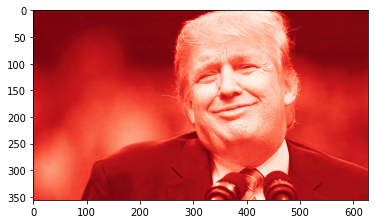

In [41]:
plt.imshow(reds, cmap=plt.cm.Reds_r)

Generazione di numeri casuali
---
Il modulo *random* di NumPy gestisce la generazione di (array di) numeri casuali da vari tipi di distribuzione statistica.

In [42]:
import numpy.random as rdm

a = rdm.random()#uniforme continua in [0.0, 1.0)

a

0.35567851739583844

In [43]:
A = rdm.random((5,5))#uniforme continua in [0.0, 1.0), shape assegnata

A

array([[0.85442311, 0.03364432, 0.93913523, 0.95108695, 0.59134941],
       [0.72634341, 0.84977964, 0.04994917, 0.22672152, 0.34083863],
       [0.74036339, 0.20129407, 0.65058836, 0.20317366, 0.338508  ],
       [0.07216048, 0.68717701, 0.70676229, 0.88953524, 0.63612826],
       [0.8072049 , 0.73934962, 0.66311261, 0.03277501, 0.50155811]])

In [44]:
B = rdm.randint(0, 10, (4,5))#uniforme discreta in [0,10), shape assegnata

B

array([[2, 2, 9, 3, 8],
       [9, 8, 9, 5, 5],
       [4, 7, 6, 6, 0],
       [1, 6, 8, 5, 6]])

In [45]:
C = rdm.normal(3, 1, (4,5))#normale con media 3 e deviazione standard 1, shape assegnata

C

array([[0.93732852, 2.82218478, 3.17655441, 2.35898897, 2.79983029],
       [3.23817691, 3.19368998, 4.49184161, 2.6563331 , 3.46977199],
       [4.48778627, 1.656538  , 2.02347298, 2.98852495, 1.73790041],
       [3.89550114, 3.65394112, 2.65598472, 1.89851856, 2.59052283]])

Operazioni aggregate e *axes*
---
Quando si ha a che fare con grandi quantità di dati, l'estrazione di statistiche globali è uno dei primi passi. Le operazioni aggregate riducono la dimensionalità dei dati.

La somma di tutti gli elementi di un array si ottiene con la funzione *sum*.

In [46]:
a = rdm.normal(0, 1, (50,))

a

array([ 0.28441436, -0.60145059, -0.00774029,  0.18392401, -0.61361265,
        2.42397672,  0.38620753,  0.38031261, -0.24128905,  0.20271543,
        0.33531432, -0.78864779,  0.67222077,  0.63821241, -0.71607603,
        0.10651166, -2.17284826,  0.95549739, -1.83456932, -0.75307153,
       -0.74959433, -0.15664381,  1.05830783, -1.12879975, -0.23361433,
        1.04655567, -0.30714578, -0.53788624, -1.71820586, -0.1197428 ,
       -1.23473481, -0.38609069,  3.0045021 ,  1.12906265,  1.60473968,
        0.78350055,  0.48541049,  0.62978378,  1.37362709,  0.14352997,
        1.03939087,  1.3807831 ,  1.07979378, -1.31594853,  1.30873879,
       -1.64187639,  0.33120398,  1.29087189, -1.58225731, -0.08926065])

In [47]:
np.sum(a)

5.328002601351228

In [48]:
sum(a)

5.328002601351232

Quando le dimensioni degli array sono grandi, le operazioni aggregate di NumPy sono molto più efficienti di quelle default di Python.

In [49]:
np.mean(a)

0.10656005202702457

### Esercizio 2
Senza costrutti NumPy, scrivere un'implementazione della *deviazione standard*,

$$\sigma := \sqrt{\frac{1}{n}\sum_{i=1}^n{(x_i - \bar{x}_i)^2}},$$


e confrontare risultati con l'equivalente NumPy, *std*.

In [ ]:
import numpy as np
from math import sqrt

def py_std(x):
    #FILL ME

#FILL ME

Le funzioni aggregate di NumPy possono essere utilizzate su ognuno degli *axes* di un array. Ogni axis corrisponde ad una dimensione; il numero di axes è quindi pari al valore del campo ndim.

In [50]:
A = np.random.randint(0, 5, (3,5))

A

array([[2, 4, 0, 2, 0],
       [2, 4, 3, 3, 4],
       [4, 1, 0, 2, 1]])

In [51]:
np.sum(A)

32

In [52]:
np.sum(A, axis=0)#somma 'lungo le righe' --> genero una riga

array([8, 9, 3, 7, 5])

In [53]:
np.sum(A, axis=1)#somma 'lungo le colonne' --> genero una colonna

array([ 8, 16,  8])

In [54]:
np.mean(A, axis=1)

array([1.6, 3.2, 1.6])

### *Esercizio 3*

Abbiamo un filmato in bianco e nero (ogni pixel avrà un valore intero da 0 a 255), formato da 50 frame 5x5.

- rappresentare un filmato (generare numeri casuali per i valori dei pixel) tramite un array NumPy
- calcolare il valore medio di intensità dei singoli pixel.

In [48]:
#FILL ME

*stack* e *split*
---
Array NumPy con una profondità e un numero coerente di dimensioni possono essere combinati tra loro.

Le funzioni *hstack* e *vstack* prendono in ingresso una lista di array e li affiancano orizzontalmente (h) o verticalmente (v).

In [55]:
A = np.arange(16).reshape(4,4)

A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [56]:
B = np.arange(16,32).reshape(4,4)

B

array([[16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [57]:
C = np.hstack([A,B])

C

array([[ 0,  1,  2,  3, 16, 17, 18, 19],
       [ 4,  5,  6,  7, 20, 21, 22, 23],
       [ 8,  9, 10, 11, 24, 25, 26, 27],
       [12, 13, 14, 15, 28, 29, 30, 31]])

In [58]:
D = np.vstack([A,B])

D

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

[Le funzioni *hsplit* e *vsplit*](https://numpy.org/doc/stable/reference/generated/numpy.split.html) realizzano l'operazione inversa alla concatenazione.

Aritmetica degli array
---

Uno dei punti di forza di NumPy è la [possibilità di vettorizzare le operazioni](https://jakevdp.github.io/PythonDataScienceHandbook/02.03-computation-on-arrays-ufuncs.html).

Calcoliamo i *reciproci* $\frac{1}{x}$ degli elementi di un array.

In [59]:
values = [4, 4, 5, 2, 5]
reciprocals = [1/x for x in values]

print('valori originali:', values)
print('valori reciproci:', reciprocals)

valori originali: [4, 4, 5, 2, 5]
valori reciproci: [0.25, 0.25, 0.2, 0.5, 0.2]


Facciamo la stessa cosa con l'artimetica degli array di NumPy.

In [60]:
values = np.array(values)
np_reciprocals = 1/values

print('valori originali:', values)
print('valori reciproci:', np_reciprocals)

valori originali: [4 4 5 2 5]
valori reciproci: [0.25 0.25 0.2  0.5  0.2 ]


Tutte le operazioni aritmetiche fondamentali possono essere usate sugli array NumPy.

In [61]:
a = np.arange(10)
print('a:', a)
print('\na + 5:', a + 5)
print('\na - 5:', a - 5)
print('\na * 2:', a * 2)
print('\na / 2:', a / 2)

a: [0 1 2 3 4 5 6 7 8 9]

a + 5: [ 5  6  7  8  9 10 11 12 13 14]

a - 5: [-5 -4 -3 -2 -1  0  1  2  3  4]

a * 2: [ 0  2  4  6  8 10 12 14 16 18]

a / 2: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]


L'aritmetica funziona anche per array con più dimensioni.

In [62]:
A = np.arange(20).reshape(5,4)

A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [63]:
A / 2

array([[0. , 0.5, 1. , 1.5],
       [2. , 2.5, 3. , 3.5],
       [4. , 4.5, 5. , 5.5],
       [6. , 6.5, 7. , 7.5],
       [8. , 8.5, 9. , 9.5]])

In [64]:
- A

array([[  0,  -1,  -2,  -3],
       [ -4,  -5,  -6,  -7],
       [ -8,  -9, -10, -11],
       [-12, -13, -14, -15],
       [-16, -17, -18, -19]])

### *Esercizio 4*

- generare un array di numeri distribuiti normalmente con media 5 e deviazione standard 3
- sottrarre 5 a tutti gli elementi dell'array
- calcolare la deviazione standard degli elementi dell'array utilizzando le funzioni NumPy mean, sum e sqrt e l'aritmetica degli array
- controllare che il risultato sia (vicino a 3 e) uguale a quello ottenuto con la funzione NumPy std

In [59]:
#FILL ME

*Esercizio 5*
---

Rappresentare attraverso array NumPy i dati del primo esempio di classificazione con KNN che trovate sulle slide. Calcolate le distanze euclidee tra $x^{new}$ e ciascun esempio in $X^{train}$.

In [60]:
#FILL ME

*Esercizio 6*
---
Rappresentare attraverso array NumPy i dati del secondo esempio di classificazione KNN delle slide. Ripetere l'analisi, calcolando le distanze tra $d(A,B)$ e $d(A,C)$ prima e dopo la scalatura delle feature tra 0 e 1. 

In [61]:
#FILL ME

*Esercizio 7*
---
Implementare il modello $k$-nearest neighbors (KNN) per la classificazione. In particolare, costruire una funzione che
- utilizza operazioni aggregate e vettoriali di NumPy
- prende in ingresso
 * un intero $k$
 * un array bidimensionale di esempi $X_{train}$ (per comodità, generare numeri casuali tra 0 e 1)
 * un array di etichette $y_{train}$ (interi, 0 o 1)
 * un nuovo esempio da classificare $x_{new}$ (sempre tra 0 e 1)
- predice la classe di $x_{new}$ restituendo la più frequente tra le etichette (una qualsiasi in caso di pareggio) dei $K$ esempi di $X_{train}$ più vicini a $x_{new}$.

**Qualche consiglio**:

1. Il costrutto
        np.argmax(np.bincount(x))
   dove *x* è un array di interi, restituisce l'elemento più frequente tra quelli di x
   
2. Dare un occhio alla funzione [*argsort*](https://stackoverflow.com/questions/17901218/numpy-argsort-what-is-it-doing).

In [65]:
#FILL ME

print(np.argmax(np.bincount([1,1,0,0,0,0,1,0])))
print(np.argsort([4,1,0,2,3]))#indici che ordinerebbero l'array

0
[2 1 3 4 0]


<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter.
</footer>